# numpy中的快速傅里叶变换以及理想高通滤波

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
img1 = cv2.imread("../img/lena_gray.jpg",0) #灰度图模式读图
img1.shape

(512, 512)

傅里叶变换，第一行是将原图进行傅里叶变换，第二行是将变换后的图像进行平移

In [8]:
fft_unshift = np.fft.fft2(img1)
fft_shift = np.fft.fftshift(fft_unshift)

其中越靠近中心位置频率越低，越亮（灰度值越高）的位置代表该频率的信息振幅越大。

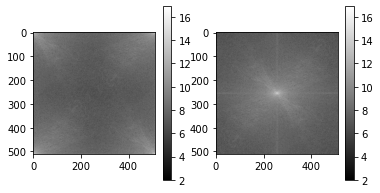

In [14]:
fig = plt.figure()
ax = fig.add_subplot(121)
#显示图像的时候取log
plt.imshow(np.log(np.abs(fft_unshift)),cmap = "gray")
plt.colorbar(shrink = 0.8)
ax = fig.add_subplot(122)
plt.imshow(np.log(np.abs(fft_shift)),cmap = "gray")
plt.colorbar(shrink = 0.8)

傅里叶逆变换

In [12]:
ifft = np.fft.ifftshift(fft_shift)
ifft_shift = np.fft.ifft2(ifft)

Text(0.5, 1.0, 'ifft result')

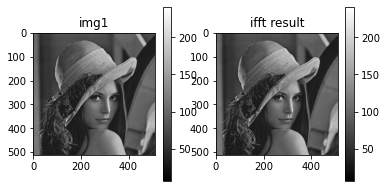

In [22]:
fig = plt.figure()
ax = fig.add_subplot(121)  
plt.imshow(img1,cmap = "gray")
plt.colorbar(shrink = 0.8)
plt.title("img1")
ax = fig.add_subplot(122) 
plt.imshow(np.abs(ifft_shift),cmap = "gray")
plt.colorbar(shrink = 0.8)
plt.title("ifft result")

## 高通滤波

In [24]:
h,w = fft_shift.shape
fft_shift_highpass = fft_shift.copy()

将频谱图中心大小为100*100的方块置为0，因为中心对应低频

In [35]:
fft_shift_highpass[h//2-50:h//2+50,h//2-50:h//2+50] = 0

In [36]:
ifft_highpass = np.fft.ifft2(fft_shift_highpass)

Text(0.5, 1.0, 'highpass filter result')

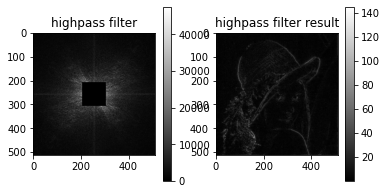

In [37]:
fig = plt.figure()
ax = fig.add_subplot(121)  
plt.imshow(np.abs(fft_shift_highpass),cmap = "gray") #这里不要用log显示，请思考原因?
plt.colorbar(shrink = 0.8)
plt.title("highpass filter")
ax = fig.add_subplot(122) 
plt.imshow(np.abs(ifft_highpass),cmap = "gray")
plt.colorbar(shrink = 0.8)
plt.title("highpass filter result")